# Project Notebook


## Before you start:
* **Make your own copy** of this notebook
  * Select 'File' --> 'Save a copy in Drive...'
  * Add your name in front of the title of the notebook by clicking on the file name above.  

---
---
# 15.9.9 A Deep Dive Into Netflix's Movies and TV Shows


---

***
## Authorship and Resources Used
* Launi Chanthaboury
* None
* ChatGPT - Specifically for dropping values by using masking. [Markdown links use this formatting.](https://chat.openai.com/)

***
## Data Description and Source
* I picked a dataset that is complied of shows, shorts, movies, and media that is on Netflix as of 2021. It also includes the IMDB ratings for each of these films/shows. I picked this because Netflix is apart of many people's lives, and I thought it would be neat to see if there were any trends and who the winners were.
* (Delete this instruction and replace with response.) Data attribution: Kaggle. This dataset was last updated 2 years ago, and it comes from a creator named Snehaan Bhawal.

***
## Research Question
* Are there noticeable trends/patterns in our Netflix films/shows? Which ones perform the best? Netflix is becoming apart of many people's daily lives, and it is very relevant to most people. Through this data analysis we can gain a better understanding of how we as people perceive our media and the world around us.

***
## Import Libraries and Set Preferences for Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
# add any additional libraries or plot preferences to this block

***
## Read and Verify Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Here I insert the data through a csv. I created a new columns sorting each country into a "Continent" column. This is what drove my data exploration, and lead me to asking myself questions about how different continents performed against each other. I also renamed a few of the "type" variables to help myself better visualize the different types of media.

In [ ]:
# enter and test your code here
df = pd.read_csv('/content/drive/MyDrive/15.9.9 Project Folder/netflix_list[1].csv')


df = df.drop('image_url', axis=1)



df = df[~(df['orign_country'] == '-')]
df = df[~(df['type'] == 'videoGame')]
df.loc[:, 'orign_country'].unique()

conditions = [
    df['orign_country'].isin(['United States', 'Mexico', 'Canada', 'Bahamas', 'Costa Rica', 'Haiti', 'Puerto Rico']),
    df['orign_country'].isin(['United Kingdom', 'Norway', 'Ireland', 'Spain', 'Poland', 'France', 'Germany',
  'Belgium', 'Italy', 'Sweden', 'Hungary', 'Czech Republic', 'Iceland', 'Austria',
    'Turkey', 'Netherlands', 'Denmark', 'Finland', 'Russia', 'Bulgaria', 'Luxembourg',
    'Romania', 'Portugal', 'Georgia', 'Greece', 'Switzerland', 'Croatia', 'Albania',
    'Belarus', 'Moldova', 'Cyprus']),
    df['orign_country'].isin(['China', 'India', 'Japan', 'South Korea', 'Indonesia', 'Hong Kong', 'Taiwan',
                               'Vietnam', 'Malaysia', 'Singapore', 'Thailand', 'Philippines', 'Cambodia', 'Pakistan',
                               'Saudi Arabia', 'Jordan', 'Kuwait', 'Iraq', 'Israel', 'Korea', 'Lebanon', 'Occupied Palestinian Territory', 'Syria', 'United Arab Emirates']),
    df['orign_country'].isin(['Brazil', 'Argentina', 'Chile', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela', 'Colombia']),
    df['orign_country'].isin(['South Africa', 'Nigeria', 'Cameroon', 'Egypt', 'Kenya', 'Senegal', 'Ghana', 'Mauritius', 'Tunisia']),
    df['orign_country'].isin(['Australia', 'New Zealand'])

]



values = ['North America', 'Europe', 'Asia', 'South America', 'Africa', 'Oceania']


df['Continent'] = np.select(conditions, values, default='Other')



df['type'].replace({'tvSeries': 'Series', 'tvEpisode': 'Series', 'movie': 'Movies', 'tvMovie': 'Movies', 'video': 'Movies', 'short': 'Shorts', 'tvShort': 'Shorts', 'tvSpecial': 'Specials', 'tvMiniSeries': 'Mini Series'}, inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6456 entries, 0 to 7007
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        6456 non-null   object 
 1   title          6456 non-null   object 
 2   popular_rank   6456 non-null   object 
 3   certificate    2336 non-null   object 
 4   startYear      6221 non-null   float64
 5   endYear        1110 non-null   float64
 6   episodes       2246 non-null   float64
 7   runtime        6455 non-null   object 
 8   type           6455 non-null   object 
 9   orign_country  6456 non-null   object 
 10  language       6456 non-null   object 
 11  plot           6099 non-null   object 
 12  summary        6456 non-null   object 
 13  rating         5767 non-null   float64
 14  numVotes       5767 non-null   float64
 15  genres         6455 non-null   object 
 16  isAdult        6456 non-null   int64  
 17  cast           6456 non-null   object 
 18  Continen

***
## Analyses and Visualizations
* This is a box plot showing all the different types of media. I did this to see how different types of media stack up against each other in terms of ratings. It is important to note that Series and Movies have *a lot* more counts than the rest of the types which could skew the data and central tendency.

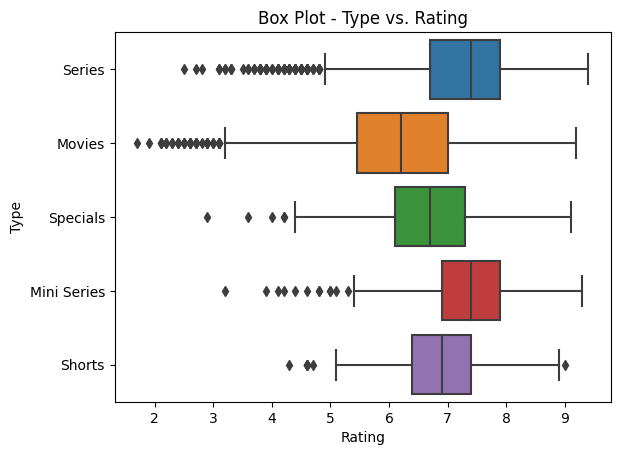

In [ ]:
# enter and test your code here
sns.boxplot(y='type', x='rating', data=df)

plt.title("Box Plot - Type vs. Rating")
plt.xlabel("Rating")
plt.ylabel("Type")

# Show the plot
plt.show()

Here, I made a count plot to show each type of media and I also added the continents. I added the continents to see just how much each continent was producing media. The big takeway here is that North America dominates in every aspect, no matter the media type. This lead me to analyze Movies and Series specifically.

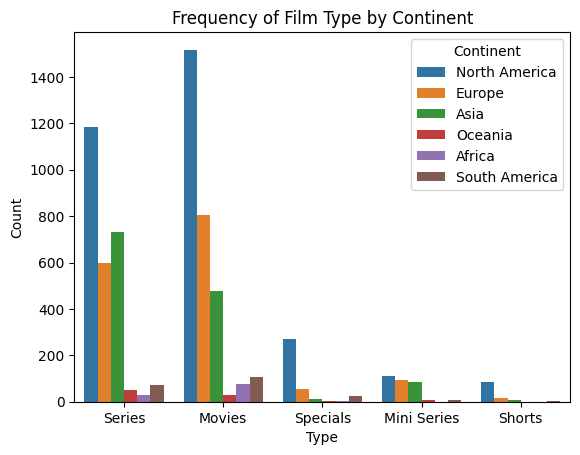

In [ ]:
sns.countplot(x='type', data=df, hue='Continent')

plt.title("Frequency of Film Type by Continent")
plt.xlabel("Type")
plt.ylabel("Count")

plt.show()

This is a bar plot of media type vs ratings by North America and Europe. The takeaway here is to notice the slight difference in ratings, for each type respectively. This sparked my data exploration, and it made me want to dive into this deeper.

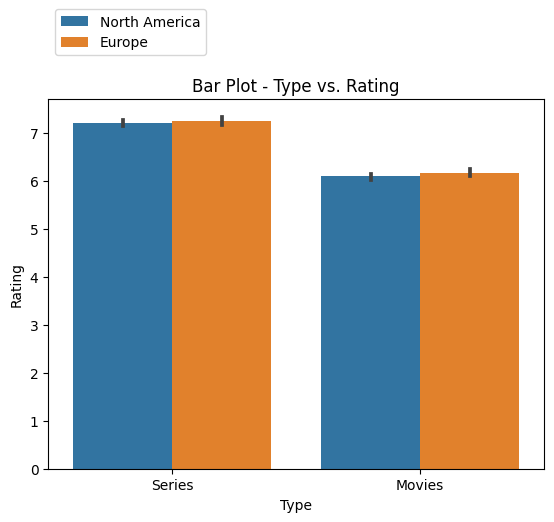

In [ ]:
continents_to_include = ['North America', 'Europe']
mask = (df['Continent'].isin(continents_to_include)) & (df['type'].isin(['Series', 'Movies']))
north_america_europe = df[mask]



sns.barplot(x='type', y='rating', data=north_america_europe, hue='Continent')
plt.title("Bar Plot - Type vs. Rating")
plt.xlabel("Type")
plt.ylabel("Rating")
plt.legend(loc='lower left', bbox_to_anchor=(0, 1.1))

plt.show()

I noticed a that there is a *very* similar trend when it comes to release year of a film/movie and ratings throughout the years of 1980 - 2021. In addition, this excludes all other continents besides North America and Europe. This was the most interesting piece of my exploration.

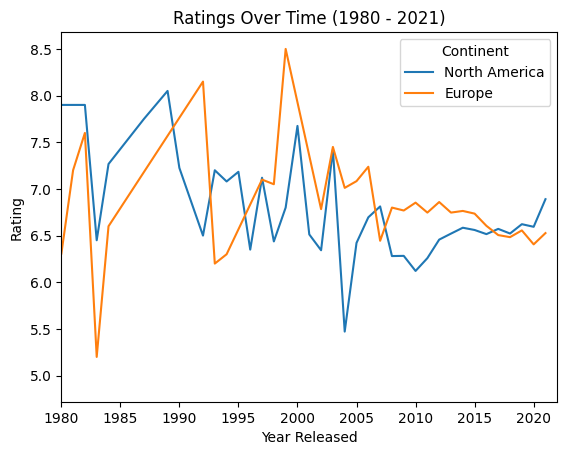

In [ ]:
sns.lineplot(x = 'startYear', y = 'rating', data = north_america_europe, hue = 'Continent', errorbar=None)
plt.xlim(1980,2022)
plt.xticks(range(1980, 2022, 5))

plt.title("Ratings Over Time (1980 - 2021)")
plt.xlabel("Year Released")
plt.ylabel("Rating")

plt.show()

Here, I analyze this trend once again but during the years 2000 - 2021. I thought it was again shocking to see such a similar pattern. It made me wonder - how do we perceive North American media vs. European media? And is there much of a difference there?

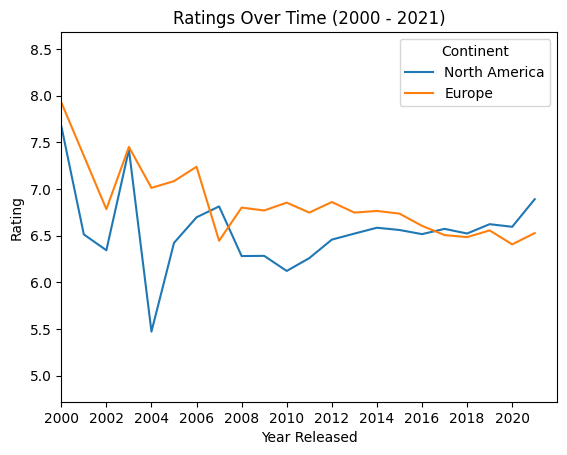

In [ ]:
sns.lineplot(x = 'startYear', y = 'rating', data = north_america_europe, hue = 'Continent', errorbar=None)
plt.xlim(2000,2022)
plt.xticks(range(2000, 2022, 2))

plt.title("Ratings Over Time (2000 - 2021)")
plt.xlabel("Year Released")
plt.ylabel("Rating")

plt.show()

Masking for the peak year of 2003.

In [ ]:
peak_ratings = north_america_europe[north_america_europe.loc[:,'startYear'] == 2003]

Dropping inconsistent naming in the peak year of 2003. I tried to see if there was any correlation between the two continuous variables runtime and ratings. However there was virtually no relation at all.

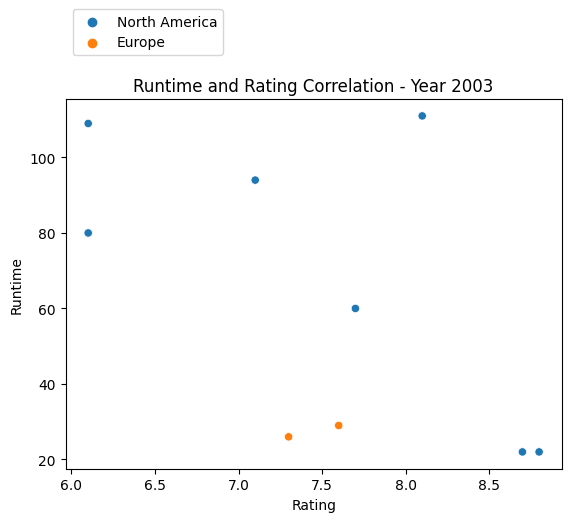

In [ ]:
word_to_check = 'Scare Tactics'

mask = peak_ratings['title'].str.contains(word_to_check, case=False)

peak_ratings = peak_ratings[~mask]


word_to_check = 'Venus on the Halfshell'

mask = peak_ratings['title'].str.contains(word_to_check, case=False)

peak_ratings = peak_ratings[~mask]


peak_ratings['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
sns.scatterplot(x = 'rating', y = 'runtime', data = peak_ratings, hue = 'Continent')
plt.legend(loc='lower left', bbox_to_anchor=(0, 1))
plt.title("Runtime and Rating Correlation - Year 2003")
plt.xlabel("Rating")
plt.ylabel("Runtime")
plt.legend(loc='lower left', bbox_to_anchor=(0, 1.1))

plt.show()

***
## Conclusions
* Ratings for movies despite the release year are going to be perceived in similar fashion when it comes to North America vs. European media. It is hard to see any correlation between ratings and runtime, so one can assume that these are not directly related. One can draw more conclusions about how other people view North Americans and their media, and one can also ask if this differs from Europeans. Does the media accurately depict North Americans and does the media accurately depict Europeans?


---
---

In [ ]:
#@title Completed the exercise?
#@markdown Click on the arrow to the left to create the submission form.

import os
import sys

tool_path = '/content/cs125_tools/'

if not os.path.exists(tool_path):
  ! git clone --quiet https://github.com/bsheese/cs125_tools.git

if tool_path not in sys.path:
  sys.path.append(tool_path)

import project_report_response as prr

prr.display_form(prr.er_question_list)


If this form does not display correctly in Colab, select "Runttime" from the menu at the top, then select "Restart and run all"
Your first name:


Text(value='', placeholder='Enter your first name here')


Your last name:


Text(value='', placeholder='Enter your last name here')


What class was this project for?


Dropdown(options=('None selected', 'CS/DS125', 'DS225', 'CS/DS377', 'CS380/DS395'), value='None selected')


Which project are you submitting?


Dropdown(options=('None selected', '9.9.2 Visualizations - Multiple', '13.9.1 Correlations/Scatterplots', '15.…


Share your notebook.
Select 'Share' at the top of the screen. Then select 'Get Link'.
Change the Link so anyone can view it.
Click 'Copy Link', then 'Done'. Paste the link here.


Textarea(value='', placeholder='Enter your response here')

In [ ]:
#@title Ready to Submit?
#@markdown If you have completed the project and the submission form:
#@markdown * check the box 'Ready' box below
#@markdown * execute this cell

Ready = True #@param {type:"boolean"}

try:
  if Ready == True:
    prr.submit_exercise_response(prr.er_question_list)

  else:
    print('NOT SUBMITTED!!!')
    print('Check the ready box if you are ready to submit your response.')

except:
  print('NOT SUBMITTED!!!')
  print('Execute the cell above to create the form.')

Exercise response submitted.
